In [3]:
import pandas as pd

# Load the dataset
file_name = "healthcare_dataset.csv"
df = pd.read_csv(file_name)

print("--- Initial Data Inspection ---")
print("\nDataFrame Head:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nDataFrame Info:")
df.info()

print("\n--- Missing Value Check ---")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))

print("\n--- Unique Values in Key Categorical Columns ---")

--- Initial Data Inspection ---

DataFrame Head:
| Name          | Age   | Gender   | Blood Type   | Medical Condition   | Date of Admission   | Doctor           | Hospital                   | Insurance Provider   | Billing Amount   | Room Number   | Admission Type   | Discharge Date   | Medication   | Test Results   |
|:--------------|:------|:---------|:-------------|:--------------------|:--------------------|:-----------------|:---------------------------|:---------------------|:-----------------|:--------------|:-----------------|:-----------------|:-------------|:---------------|
| Bobby JacksOn | 30    | Male     | B-           | Cancer              | 2024-01-31          | Matthew Smith    | Sons and Miller            | Blue Cross           | 18856.3          | 328           | Urgent           | 2024-02-02       | Paracetamol  | Normal         |
| LesLie TErRy  | 62    | Male     | A+           | Obesity             | 2019-08-20          | Samantha Davies  | Kim Inc             

In [4]:
# Check unique values for cleaning purposes, focusing on a few important columns
categorical_cols = ['Gender', 'Medical Condition', 'Insurance Provider', 'Blood Type', 'Admission Type', 'Test Results', 'Medication']

for col in categorical_cols:
    if col in df.columns:
        print(f"\nUnique values in '{col}':")
        # Print the value counts to identify inconsistent casing/naming
        print(df[col].value_counts().sort_index().to_markdown(numalign="left", stralign="left"))

# Continue from the previous DataFrame 'df'

print("--- Step 1: Date Feature Engineering and Feature Creation ---")


Unique values in 'Gender':
| Gender   | count   |
|:---------|:--------|
| Female   | 27726   |
| Male     | 27774   |

Unique values in 'Medical Condition':
| Medical Condition   | count   |
|:--------------------|:--------|
| Arthritis           | 9308    |
| Asthma              | 9185    |
| Cancer              | 9227    |
| Diabetes            | 9304    |
| Hypertension        | 9245    |
| Obesity             | 9231    |

Unique values in 'Insurance Provider':
| Insurance Provider   | count   |
|:---------------------|:--------|
| Aetna                | 10913   |
| Blue Cross           | 11059   |
| Cigna                | 11249   |
| Medicare             | 11154   |
| UnitedHealthcare     | 11125   |

Unique values in 'Blood Type':
| Blood Type   | count   |
|:-------------|:--------|
| A+           | 6956    |
| A-           | 6969    |
| AB+          | 6947    |
| AB-          | 6945    |
| B+           | 6945    |
| B-           | 6944    |
| O+           | 6917    |
| O-     

In [5]:
# Convert date columns to datetime objects
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [6]:
# Calculate Length of Stay (LoS) in days (crucial feature for billing)
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
print(f"Minimum Length of Stay: {df['Length of Stay'].min()} days")
print(f"Maximum Length of Stay: {df['Length of Stay'].max()} days")

print("\n--- Step 2: Feature Dropping ---")

Minimum Length of Stay: 1 days
Maximum Length of Stay: 30 days

--- Step 2: Feature Dropping ---


In [7]:
# Drop high-cardinality/identifier columns and the original date columns
columns_to_drop = [
    'Name',
    'Doctor',
    'Hospital',
    'Date of Admission',
    'Discharge Date',
    'Room Number' # Arbitrary identifier, likely not predictive for general billing
]

df_processed = df.drop(columns=columns_to_drop)

print("Remaining columns after dropping:")
print(df_processed.columns.tolist())

print("\n--- Step 3: Check Transformed Data ---")
print("\nProcessed DataFrame Head:")
print(df_processed.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nProcessed DataFrame Info:")
df_processed.info()

print("\n--- Step 4: Target Variable Distribution Check (Billing Amount) ---")


Remaining columns after dropping:
['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Billing Amount', 'Admission Type', 'Medication', 'Test Results', 'Length of Stay']

--- Step 3: Check Transformed Data ---

Processed DataFrame Head:
| Age   | Gender   | Blood Type   | Medical Condition   | Insurance Provider   | Billing Amount   | Admission Type   | Medication   | Test Results   | Length of Stay   |
|:------|:---------|:-------------|:--------------------|:---------------------|:-----------------|:-----------------|:-------------|:---------------|:-----------------|
| 30    | Male     | B-           | Cancer              | Blue Cross           | 18856.3          | Urgent           | Paracetamol  | Normal         | 2                |
| 62    | Male     | A+           | Obesity             | Medicare             | 33643.3          | Emergency        | Ibuprofen    | Inconclusive   | 6                |
| 76    | Female   | A-           | Obesity             | Ae

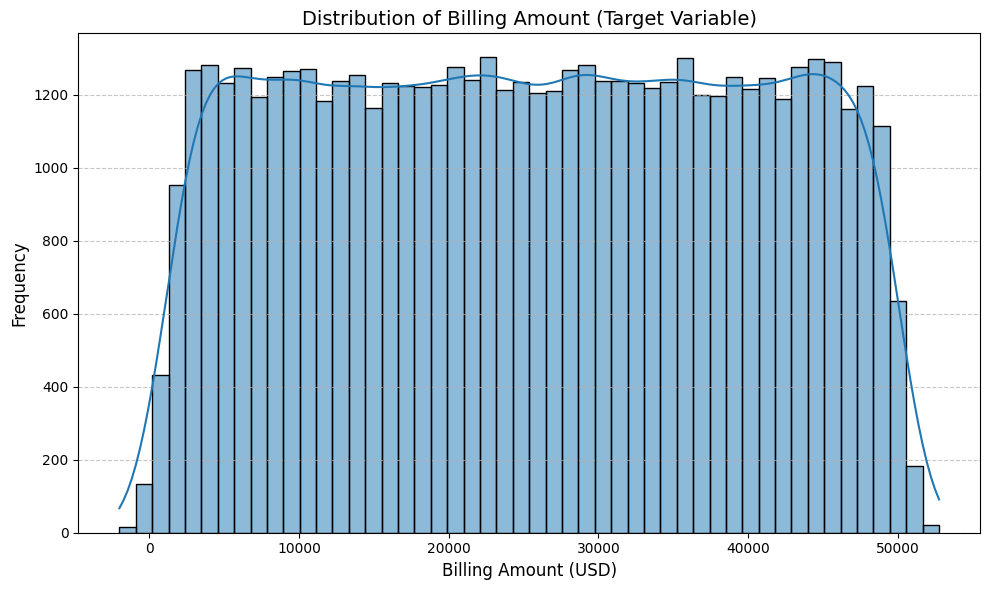

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df_processed['Billing Amount'], kde=True, bins=50)
plt.title('Distribution of Billing Amount (Target Variable)', fontsize=14)
plt.xlabel('Billing Amount (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

In [9]:
# Calculate descriptive statistics for skewness/kurtosis check
billing_stats = df_processed['Billing Amount'].describe().to_frame().T
skewness = df_processed['Billing Amount'].skew()
kurtosis = df_processed['Billing Amount'].kurt()

print("\nBilling Amount Descriptive Statistics:")
print(billing_stats.to_markdown(numalign="left", stralign="left"))
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

plt.savefig('billing_amount_distribution.png')


Billing Amount Descriptive Statistics:
|                | count   | mean    | std     | min      | 25%     | 50%     | 75%     | max     |
|:---------------|:--------|:--------|:--------|:---------|:--------|:--------|:--------|:--------|
| Billing Amount | 55500   | 25539.3 | 14211.5 | -2008.49 | 13241.2 | 25538.1 | 37820.5 | 52764.3 |
Skewness: -0.0010
Kurtosis: -1.1906


<Figure size 640x480 with 0 Axes>

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [11]:
# Load the processed DataFrame from the previous step (simulated by reading the CSV and re-running transformation)
# In a real environment, df_processed would be in memory, but we ensure reproducibility here.
file_name = "healthcare_dataset.csv"
df = pd.read_csv(file_name)
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
columns_to_drop = ['Name', 'Doctor', 'Hospital', 'Date of Admission', 'Discharge Date', 'Room Number']
df_processed = df.drop(columns=columns_to_drop)

In [12]:
# --- 1. Handle Negative Billing Amount Anomaly ---
# Set the minimum Billing Amount to 0 to correct the anomaly found in the EDA
df_processed['Billing Amount'] = df_processed['Billing Amount'].apply(lambda x: max(0, x))
print(f"Minimum Billing Amount after capping: {df_processed['Billing Amount'].min()}")

Minimum Billing Amount after capping: 0.0


In [13]:
# --- 2. Separate Features (X) and Target (y) ---
X = df_processed.drop('Billing Amount', axis=1)
y = df_processed['Billing Amount']

In [14]:
# --- 3. Define Feature Types for Preprocessing ---
numerical_features = ['Age', 'Length of Stay']
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [15]:
# --- 4. Create Preprocessing Pipeline (ColumnTransformer) ---
# Numerical: Standard Scaling
# Categorical: One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='drop' # Drop all other columns not specified (like the 'Billing Amount' we already split)
)

In [16]:
# --- 5. Split Data (Part I, Step 7 preparation) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 44400 samples
Testing set size: 11100 samples


In [17]:
# --- 6. Model Design and Implementation (Part I, Step 6) ---
# Use Random Forest Regressor for its robustness and non-linearity handling
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10, min_samples_leaf=5))
])

# Training the model
print("\nTraining the Random Forest Regressor...")
rf_model.fit(X_train, y_train)
print("Training complete.")


Training the Random Forest Regressor...
Training complete.


In [18]:
# --- 7. Model Evaluation (Part I, Step 7) ---
# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation Results (Random Forest Regressor) ---")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"R-squared Score (R^2): {r2:.4f}")


--- Model Evaluation Results (Random Forest Regressor) ---
Root Mean Squared Error (RMSE): $14,080.53
Mean Absolute Error (MAE): $12,163.94
R-squared Score (R^2): 0.0031


In [19]:
# --- 8. Feature Importance for Analysis (Part I, Step 8 preparation) ---
# Extracting feature importances from the trained model
feature_importances = rf_model['regressor'].feature_importances_

# Get feature names after one-hot encoding
feature_names = rf_model['preprocessor'].get_feature_names_out()

# Create a DataFrame for importance visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False).head(20) # Show top 20 features

C:\Users\user\AppData\Local\Temp\ipykernel_3908\600341243.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


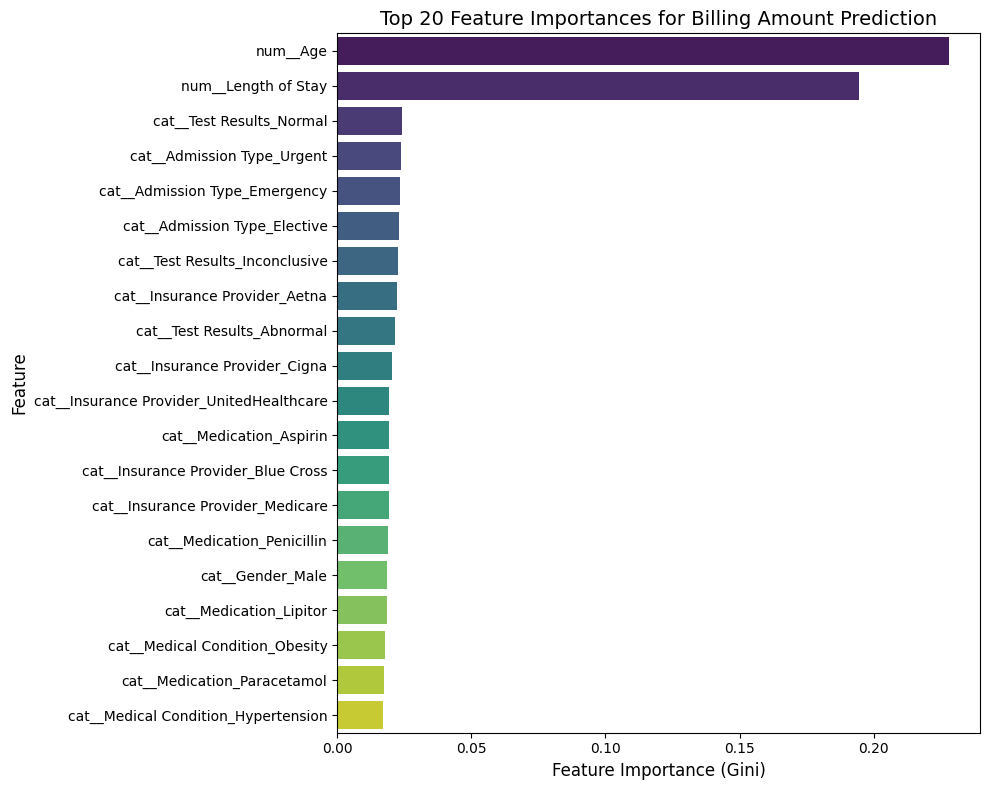

In [20]:
# --- 9. Visualization of Feature Importances ---
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Top 20 Feature Importances for Billing Amount Prediction', fontsize=14)
plt.xlabel('Feature Importance (Gini)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('feature_importance.png')


--- Step 10: Visualization of Model Fit (Actual vs. Predicted) ---
Actual vs. Predicted plot saved to 'actual_vs_predicted.png'


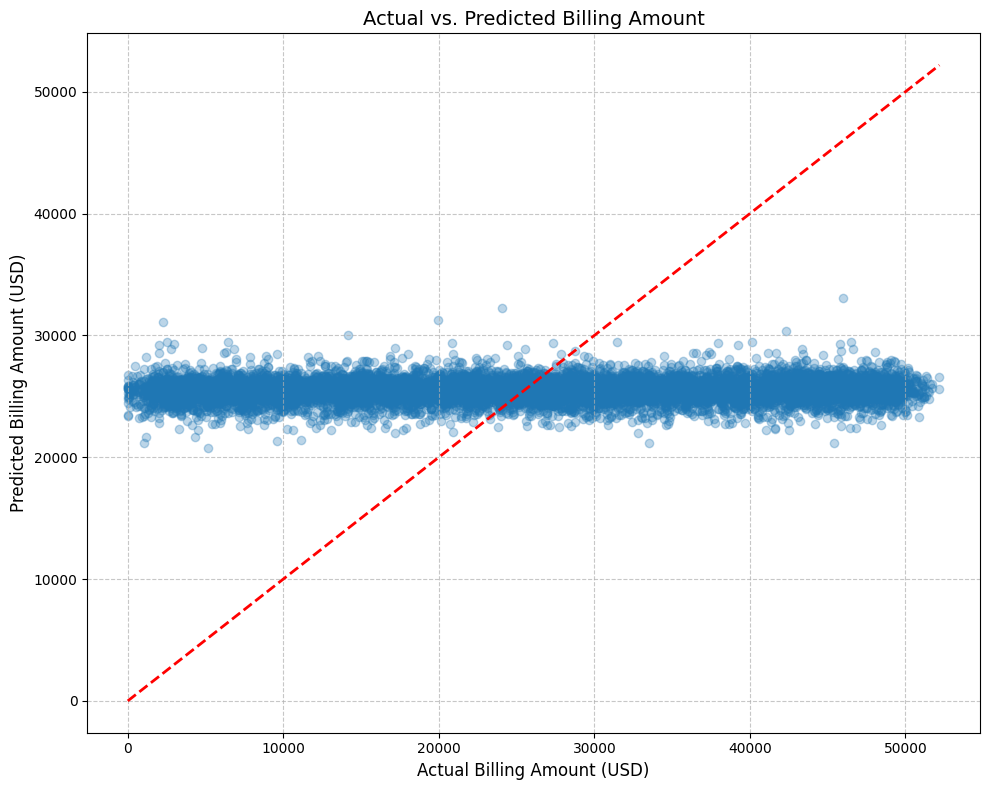

In [21]:
# Continue with the trained model and predictions (y_test, y_pred)

print("\n--- Step 10: Visualization of Model Fit (Actual vs. Predicted) ---")

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.3)
# Plot the ideal line (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Billing Amount', fontsize=14)
plt.xlabel('Actual Billing Amount (USD)', fontsize=12)
plt.ylabel('Predicted Billing Amount (USD)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('actual_vs_predicted.png')

print("Actual vs. Predicted plot saved to 'actual_vs_predicted.png'")


Residual plot saved to 'residual_plot.png'


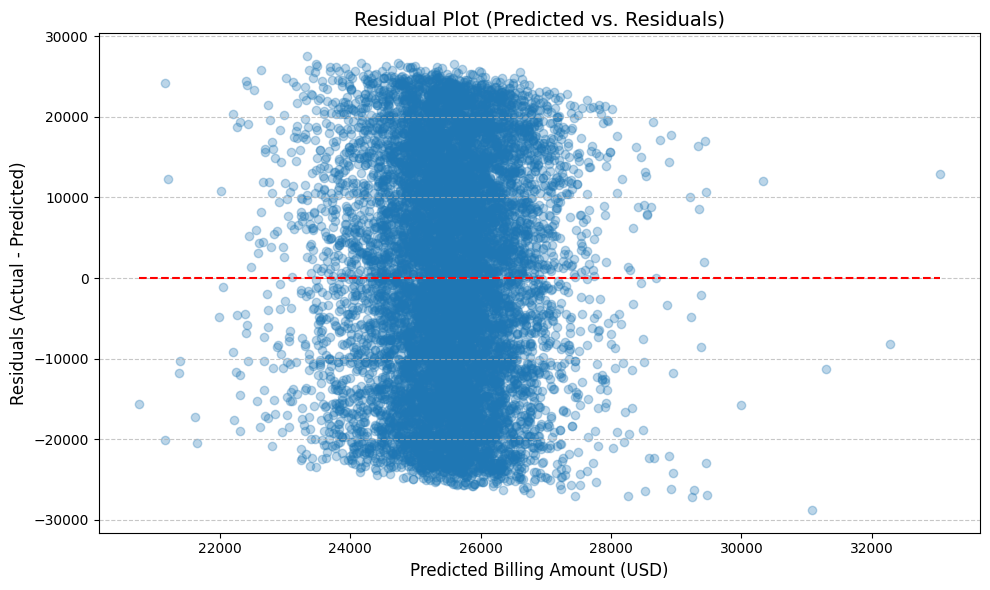

In [22]:
# --- 11. Residual Plot (Residuals vs. Fitted Values) ---
# Calculate Residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')
plt.title('Residual Plot (Predicted vs. Residuals)', fontsize=14)
plt.xlabel('Predicted Billing Amount (USD)', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('residual_plot.png')

print("Residual plot saved to 'residual_plot.png'")